In [3]:
!pip install rich
!pip install plotly

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from rich.console import Console

console = Console()

## **Donwload Data**

In [5]:
df_genomics = pd.read_csv('https://storage.googleapis.com/questionsanswersproject/Multivariado/dataset_GENOMICS%20100.csv')
console.print(f"Shape => {df_genomics.shape}")
df_genomics.head()

Shape => (500, 2001)

,Muestra_ID,Gen_1,Gen_2,Gen_3,Gen_4,Gen_5,Gen_6,Gen_7,Gen_8,Gen_9,...,Gen_1991,Gen_1992,Gen_1993,Gen_1994,Gen_1995,Gen_1996,Gen_1997,Gen_1998,Gen_1999,Gen_2000
0,Tipo001_Muestra1,-0.926129,-1.299938,3.486351,-1.102222,-0.428913,-0.747000,NaN,-1.086151,0.995133,...,-0.043145,-0.111840,-0.375548,-0.528212,0.759602,-0.026776,-0.207460,-0.388127,1.968288,-1.681775
1,Tipo001_Muestra2,-0.972536,-1.477558,3.135393,-0.524263,0.094519,-1.368749,1.573978,-1.184006,0.696335,...,1.199829,2.141636,-0.066823,0.252472,1.212322,-0.998419,-0.540939,-0.630091,-0.617466,0.818629
2,Tipo001_Muestra3,-0.825555,-0.609148,3.016207,-1.031508,-0.283858,-1.056996,2.222693,-0.780960,0.677335,...,-1.041196,1.455374,-0.463369,-0.304951,-0.087723,-0.266249,0.382303,-1.026754,-0.542969,-1.480541
3,Tipo001_Muestra4,-0.625623,-0.899633,3.695983,-1.190333,0.010032,-0.366977,1.924482,-1.271057,0.636734,...,0.116033,-2.503982,1.404051,2.276509,0.739348,1.173409,1.259947,-0.637688,0.502837,-2.114035
4,Tipo001_Muestra5,-0.894942,-1.002972,3.126358,-1.179200,-0.586038,-0.545477,1.824211,-0.682414,0.717442,...,2.530071,-0.371028,-1.949529,1.374980,-0.520373,-1.265650,-0.227383,-0.253384,0.018274,-0.367521


## **Take the first 200**

In [6]:
df_genomics = df_genomics.iloc[:, 0:201]
console.print(df_genomics.shape)

(500, 201)

In [7]:
df_genomics_copy = df_genomics.copy()

In [8]:
df_genomics_copy.describe()

,Gen_1,Gen_2,Gen_3,Gen_4,Gen_5,Gen_6,Gen_7,Gen_8,Gen_9,Gen_10,...,Gen_191,Gen_192,Gen_193,Gen_194,Gen_195,Gen_196,Gen_197,Gen_198,Gen_199,Gen_200
count,474.000000,478.000000,467.000000,474.000000,477.000000,479.000000,480.000000,490.000000,485.000000,473.000000,...,478.000000,470.000000,482.000000,480.000000,487.000000,481.000000,469.000000,470.000000,474.000000,480.000000
mean,0.108857,-0.142245,0.179390,-0.053628,0.109087,-0.080285,-0.222899,0.160219,0.138217,-0.044054,...,0.143741,-0.029836,-0.208140,0.076250,-0.005389,-0.100361,-0.132054,-0.003941,-0.032287,-0.300856
std,1.424334,1.532935,1.468144,1.600764,1.522444,1.430660,1.564432,1.540954,1.600919,1.517116,...,1.723521,1.573857,1.477632,1.537024,1.568432,1.563611,1.369945,1.488812,1.451880,1.593978
min,-3.835033,-3.385068,-3.192716,-4.271294,-4.737200,-4.442083,-4.513590,-3.669728,-3.778009,-3.559368,...,-4.147380,-5.833461,-4.137582,-4.715849,-3.036115,-4.299581,-3.518062,-3.613775,-3.615234,-4.096377
25%,-0.821287,-1.197466,-0.902782,-1.120191,-0.659469,-1.077644,-1.322399,-0.681595,-1.043504,-1.147664,...,-1.113676,-0.889031,-1.160435,-0.884834,-1.316808,-1.275935,-1.131991,-1.099575,-1.007345,-1.451123
50%,0.047264,-0.241652,0.048068,0.012685,0.190318,-0.068242,-0.241761,0.331297,0.089781,-0.089848,...,0.130580,0.137508,-0.164006,0.111127,0.018921,-0.024407,-0.206747,-0.044515,-0.021149,-0.391751
75%,1.104500,0.761217,1.245191,1.057188,1.128021,0.939846,0.895336,1.092548,1.154090,0.752503,...,1.356591,1.025869,0.828157,1.094183,1.076367,0.956103,0.654075,0.961899,1.029339,0.759218
max,3.674412,5.130331,4.095005,4.154158,4.611198,4.019599,3.992493,4.406752,4.508208,4.260944,...,4.744528,3.486243,3.057247,3.771455,5.506613,3.648281,4.377241,3.959705,3.162918,4.050517


## **Strategy 1**

Strategy 1: Simple Imputation (Naive Approach)
- Impute missing values ​​from the data set using the means of each generation (column).
- Perform a PCA on the imputed data matrix.
- Generate a plot of the first two principal components (PC1 vs. PC2). Color the points according to their tumor subtype for better visualization (you can use a subset of 10-15 tumor types to make the colors distinguishable).

In [9]:
df_genomics_strategy_1_gen = df_genomics_copy.drop(columns=['Muestra_ID'])

In [10]:
# There are NA fields
console.print(f"Are there NA fields? => {df_genomics_copy.isna().sum().any() > 0}")

Are there NA fields? => True

In [11]:
df_genomics_strategy_1_gen = df_genomics_strategy_1_gen.fillna(df_genomics_strategy_1_gen.mean())
df_genomics_strategy_1_gen.head()

,Gen_1,Gen_2,Gen_3,Gen_4,Gen_5,Gen_6,Gen_7,Gen_8,Gen_9,Gen_10,...,Gen_191,Gen_192,Gen_193,Gen_194,Gen_195,Gen_196,Gen_197,Gen_198,Gen_199,Gen_200
0,-0.926129,-1.299938,3.486351,-1.102222,-0.428913,-0.747000,-0.222899,-1.086151,0.995133,-1.753780,...,3.144455,-0.029836,1.096837,-1.244325,-1.443022,-2.381379,1.048995,-1.383841,0.621816,-0.248506
1,-0.972536,-1.477558,3.135393,-0.524263,0.094519,-1.368749,1.573978,-1.184006,0.696335,-1.582650,...,3.279682,0.449016,1.318615,-1.378695,-1.000856,-2.110287,0.763144,-1.179839,1.232153,0.344501
2,-0.825555,-0.609148,3.016207,-1.031508,-0.283858,-1.056996,2.222693,-0.780960,0.677335,-1.038886,...,2.951083,0.494515,1.727196,-1.308072,-1.715366,-2.565775,0.937421,-0.525962,1.028157,0.215942
3,-0.625623,-0.899633,3.695983,-1.190333,0.010032,-0.366977,1.924482,-1.271057,0.636734,-1.413743,...,3.225449,1.140868,1.381758,-1.306104,-1.217209,-2.794594,1.227908,-0.707937,1.171632,-0.000266
4,-0.894942,-1.002972,3.126358,-1.179200,-0.586038,-0.545477,1.824211,-0.682414,0.717442,-1.033328,...,2.773673,0.385443,0.967235,-1.204508,-1.626941,-0.100361,1.366961,-1.053573,0.770814,0.105769


In [12]:
console.print(f"Are there NA fields? => {df_genomics_strategy_1_gen.isna().sum().any() > 0}")

Are there NA fields? => False

In [13]:
# Standard Scaler
scaler = StandardScaler()
df_genomics_strategy_1_gen_scaled = scaler.fit_transform(df_genomics_strategy_1_gen)

In [14]:
pca = PCA()
pca_data = pca.fit_transform(df_genomics_strategy_1_gen_scaled)

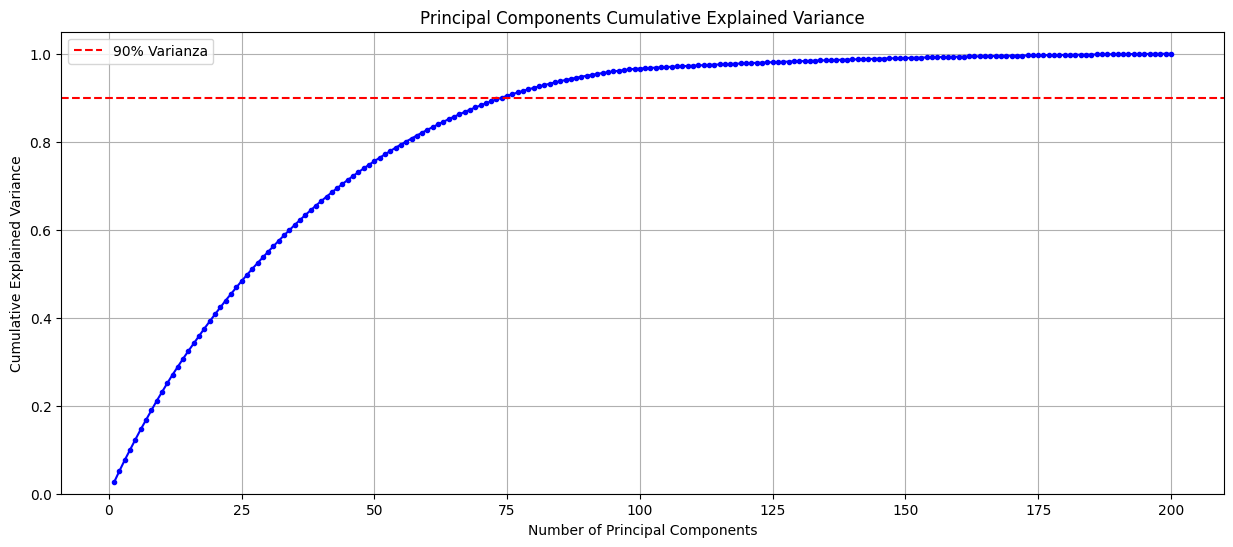

In [15]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(15, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='.', linestyle='-', color='blue')

plt.axhline(y=0.90, color='red', linestyle='--', label='90% Varianza')
plt.title("Principal Components Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.legend()
plt.ylim(0, 1.05)
plt.show()

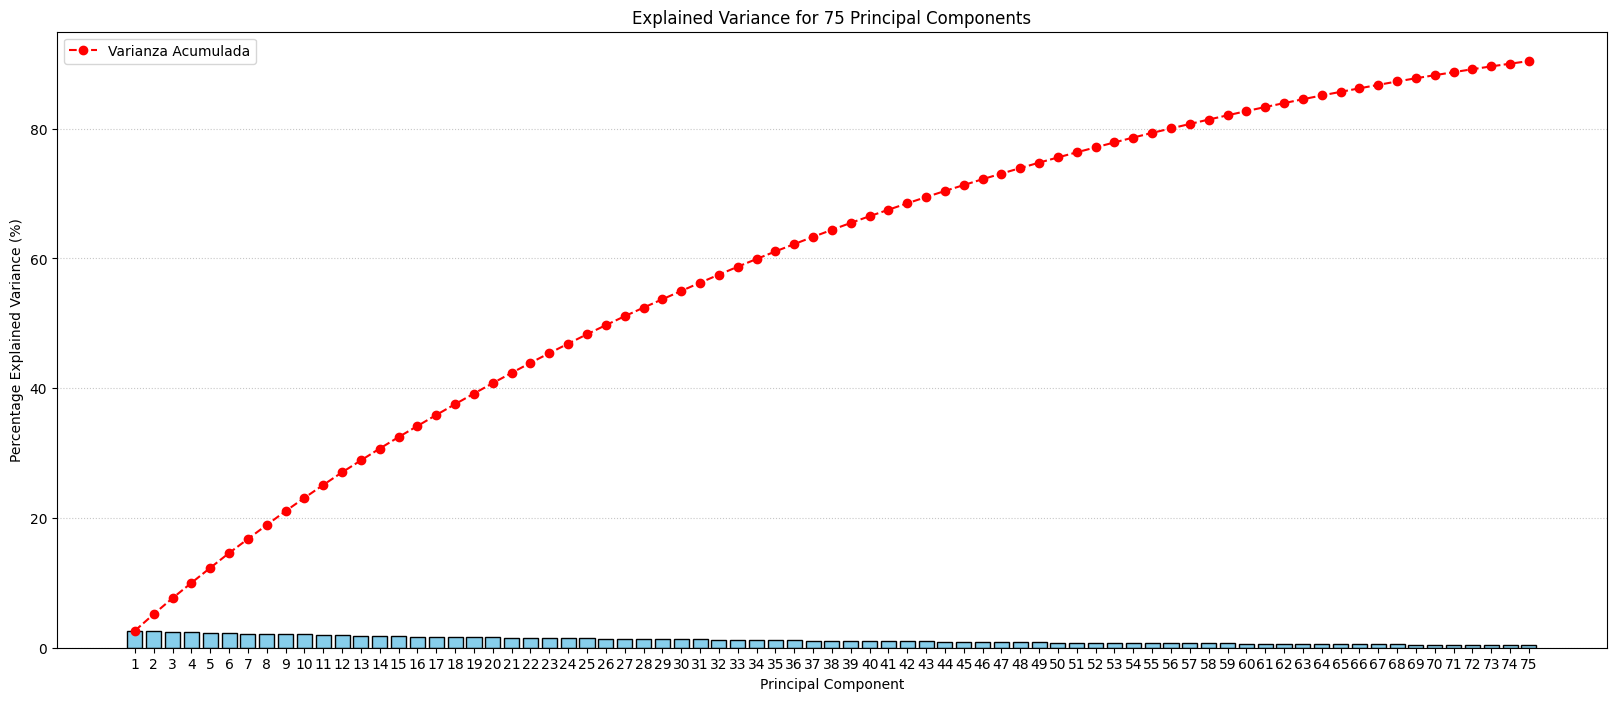

In [16]:
num_components_to_plot = 75
variances_to_plot = pca.explained_variance_ratio_[:num_components_to_plot] * 100

plt.figure(figsize=(20, 8))

plt.bar(range(1, num_components_to_plot + 1), variances_to_plot,
        color='skyblue', edgecolor='black')

plt.plot(range(1, num_components_to_plot + 1),
         cumulative_variance[:num_components_to_plot] * 100,
         marker='o',
         linestyle='--', color='red',
         label='Varianza Acumulada')

plt.title(f'Explained Variance for {num_components_to_plot} Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Percentage Explained Variance (%)')
plt.xticks(range(1, num_components_to_plot + 1))
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.legend()
plt.show()

In [17]:
loadings = pd.DataFrame(
    pca.components_.T[:, :2], # Tomamos solo los 2 primeros componentes
    columns=['PC1', 'PC2'],
    index=df_genomics_strategy_1_gen.columns
)
console.print("\nLoadings (contribución de cada gen) para PC1 y PC2:")
loadings

Loadings (contribución de cada gen) para PC1 y PC2:

,PC1,PC2
Gen_1,-0.053661,0.004004
Gen_2,-0.014392,-0.012343
Gen_3,-0.037660,0.053155
Gen_4,-0.045064,0.034930
Gen_5,0.048340,-0.105453
...,...,...
Gen_196,0.016820,-0.086809
Gen_197,-0.083904,-0.084645
Gen_198,-0.038436,0.003254
Gen_199,-0.075867,0.010758


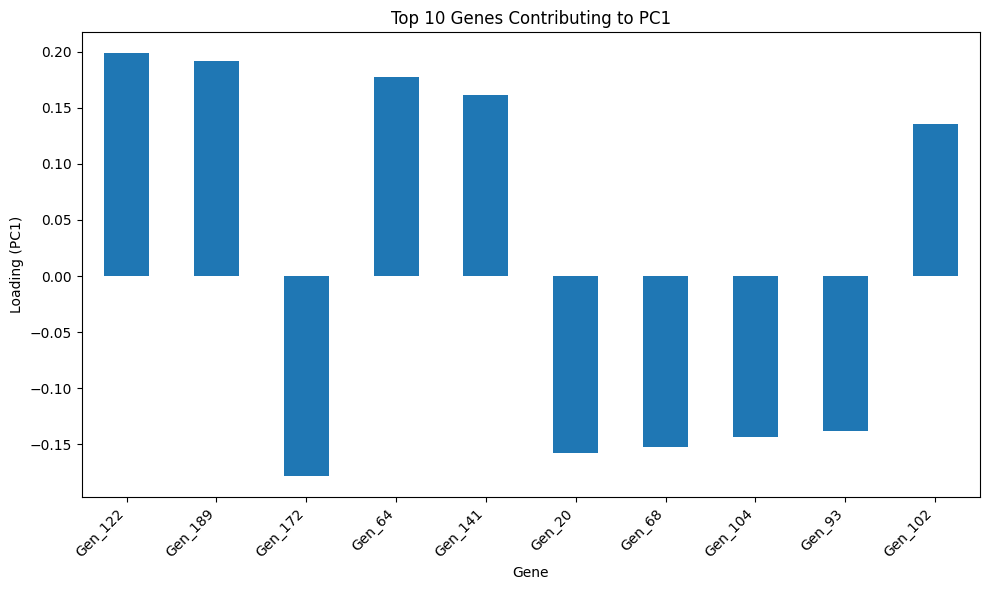

In [18]:
plt.figure(figsize=(10, 6))
loadings.reindex(loadings['PC1'].abs().sort_values(ascending=False).index).iloc[:10, 0].plot(kind='bar')
plt.title('Top 10 Genes Contributing to PC1')
plt.xlabel('Gene')
plt.ylabel('Loading (PC1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

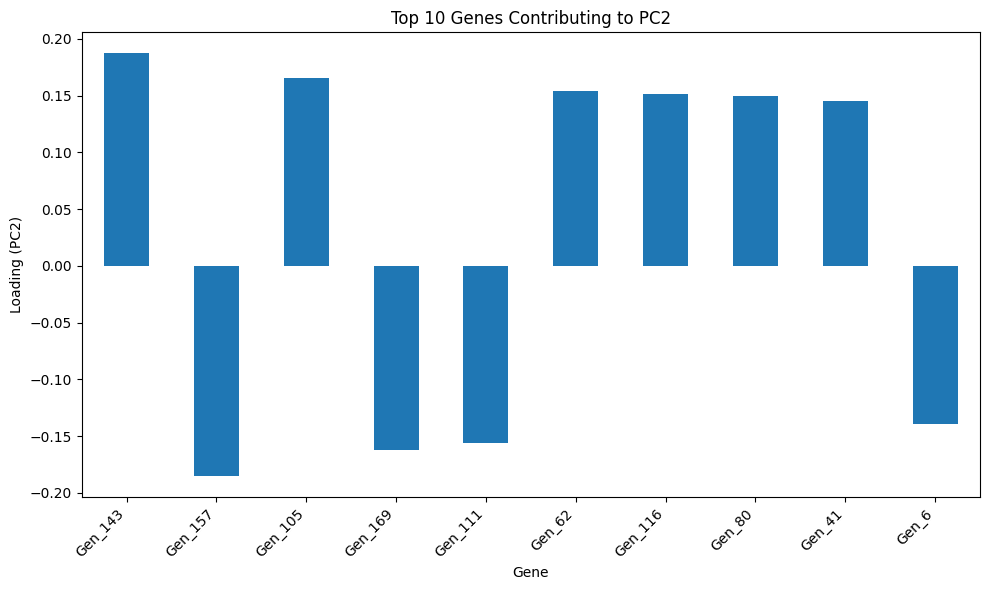

In [19]:
plt.figure(figsize=(10, 6))
loadings.reindex(loadings['PC2'].abs().sort_values(ascending=False).index).iloc[:10, 1].plot(kind='bar')
plt.title('Top 10 Genes Contributing to PC2')
plt.xlabel('Gene')
plt.ylabel('Loading (PC2)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

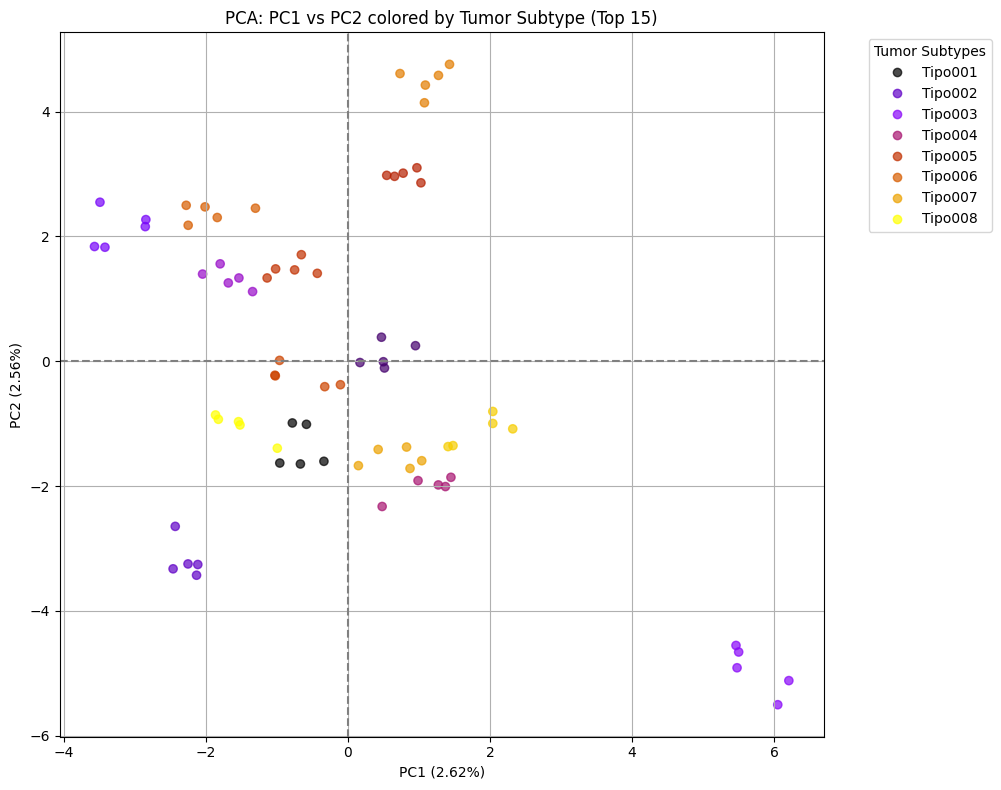

In [20]:
tumor_subtypes = df_genomics_copy["Muestra_ID"].apply(lambda x: x.split('_')[0])

scores = pca_data[:, :2]

# Get the top 15 most frequent tumor subtypes for better visualization
top_subtypes = tumor_subtypes.value_counts().nlargest(15).index.tolist()
filtered_indices = tumor_subtypes[tumor_subtypes.isin(top_subtypes)].index
scores_filtered = scores[filtered_indices]
tumor_subtypes_filtered = tumor_subtypes[filtered_indices]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(scores_filtered[:, 0], scores_filtered[:, 1], c=tumor_subtypes_filtered.astype('category').cat.codes, cmap='gnuplot', alpha=0.7)

plt.title('PCA: PC1 vs PC2 colored by Tumor Subtype (Top 15)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

legend_labels = top_subtypes
handles, _ = scatter.legend_elements()
legend = plt.legend(handles, legend_labels, title="Tumor Subtypes", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [21]:
import plotly.express as px

scores = pca_data[:, :3]

tumor_subtypes = df_genomics_copy["Muestra_ID"].apply(lambda x: x.split('_')[0])
top_subtypes = tumor_subtypes.value_counts().nlargest(15).index.tolist()
filtered_indices = tumor_subtypes[tumor_subtypes.isin(top_subtypes)].index
scores_filtered = scores[filtered_indices]
tumor_subtypes_filtered = tumor_subtypes[filtered_indices]

tumor_subtypes_filtered_str = tumor_subtypes_filtered.astype(str)

scores = pca_data[:, :3]

fig = px.scatter_3d(
    x=scores_filtered[:, 0],
    y=scores_filtered[:, 1],
    z=scores_filtered[:, 2],
    color=tumor_subtypes_filtered_str,
    title='PCA: PC1 vs PC2 vs PC3 colored by Tumor Subtype (Top 15) - Interactive Plotly',
    labels={'x': f'PC1 ({pca.explained_variance_ratio_[0]:.2%})', 'y': f'PC2 ({pca.explained_variance_ratio_[1]:.2%})', 'z': f'PC3 ({pca.explained_variance_ratio_[2]:.2%})'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

### **Conclusions Mean**

- After performing the PCA, approximately 8 groups of tumor subtypes are observed where the PCA finds variance, that is, differences between them.
- There are some groups that share characteristics, not allowing them to be separated, approximately 7 groups
- PC1 has 2.76% of the total variability
- PC2 has 2.71% of the total variability
- There is a low explained variance with two components, **approximately 5.47%**


## **Strategy 2: Advanced Imputation (Robust Approach)**

- Using a more convenient method, impute missing values ​​using the k-Nearest Neighbors (k-NN) algorithm. Justify the choice of parameter k.
- Perform PCA on this new imputed data matrix.
- Generate a plot of PC1 vs. PC2, similar to the previous step.

In [22]:
df_genomics_strategy_2_gen_tumor = df_genomics_copy.drop(columns=['Muestra_ID'])
df_genomics_strategy_2_gen_tumor.head()

,Gen_1,Gen_2,Gen_3,Gen_4,Gen_5,Gen_6,Gen_7,Gen_8,Gen_9,Gen_10,...,Gen_191,Gen_192,Gen_193,Gen_194,Gen_195,Gen_196,Gen_197,Gen_198,Gen_199,Gen_200
0,-0.926129,-1.299938,3.486351,-1.102222,-0.428913,-0.747000,NaN,-1.086151,0.995133,-1.753780,...,3.144455,NaN,1.096837,-1.244325,-1.443022,-2.381379,1.048995,-1.383841,0.621816,-0.248506
1,-0.972536,-1.477558,3.135393,-0.524263,0.094519,-1.368749,1.573978,-1.184006,0.696335,-1.582650,...,3.279682,0.449016,1.318615,-1.378695,-1.000856,-2.110287,0.763144,-1.179839,1.232153,0.344501
2,-0.825555,-0.609148,3.016207,-1.031508,-0.283858,-1.056996,2.222693,-0.780960,0.677335,-1.038886,...,2.951083,0.494515,1.727196,-1.308072,-1.715366,-2.565775,0.937421,-0.525962,1.028157,0.215942
3,-0.625623,-0.899633,3.695983,-1.190333,0.010032,-0.366977,1.924482,-1.271057,0.636734,-1.413743,...,3.225449,1.140868,1.381758,-1.306104,-1.217209,-2.794594,1.227908,-0.707937,1.171632,-0.000266
4,-0.894942,-1.002972,3.126358,-1.179200,-0.586038,-0.545477,1.824211,-0.682414,0.717442,-1.033328,...,2.773673,0.385443,0.967235,-1.204508,-1.626941,NaN,1.366961,-1.053573,0.770814,0.105769


In [23]:
# There are NA fields
console.print(f"Are there NA fields? => {df_genomics_copy.isna().sum().any() > 0}")

Are there NA fields? => True

In [24]:
# Standard Scaler
scaler = StandardScaler()
df_genomics_strategy_2_gen_scaled = scaler.fit_transform(df_genomics_strategy_2_gen_tumor)

### **Evaluate the best K for KNN**

In [25]:
ks_to_evaluate = [2, 5, 10, 20, 30, 40, 50]
console.print(f"Evaluating the following k values for KNNImputer: {ks_to_evaluate}")

Evaluating the following k values for KNNImputer: [2, 5, 10, 20, 30, 40, 50]

In [26]:
from sklearn.impute import KNNImputer

explained_variance_ratios = []

# Iteration through k values
for k in ks_to_evaluate:
    knn_imputer = KNNImputer(n_neighbors=k)
    X_train_imputed = knn_imputer.fit_transform(df_genomics_strategy_2_gen_scaled)

    pca = PCA()
    pca.fit(X_train_imputed)
    explained_variance_ratios.append(pca.explained_variance_ratio_)

### **Evaluate Results**

Cumulative explained variance for different numbers of components:

For k = 2:

1 components: 0.0270

2 components: 0.0534

5 components: 0.1277

10 components: 0.2392

50 components: 0.7769

100 components: 0.9854

For k = 5:

1 components: 0.0271

2 components: 0.0536

5 components: 0.1281

10 components: 0.2397

50 components: 0.7763

100 components: 0.9834

For k = 10:

1 components: 0.0270

2 components: 0.0536

5 components: 0.1275

10 components: 0.2385

50 components: 0.7695

100 components: 0.9755

For k = 20:

1 components: 0.0268

2 components: 0.0533

5 components: 0.1267

10 components: 0.2370

50 components: 0.7651

100 components: 0.9711

For k = 30:

1 components: 0.0268

2 components: 0.0531

5 components: 0.1263

10 components: 0.2363

50 components: 0.7634

100 components: 0.9697

For k = 40:

1 components: 0.0267

2 components: 0.0530

5 components: 0.1260

10 components: 0.2358

50 components: 0.7624

100 components: 0.9689

For k = 50:

1 components: 0.0267

2 components: 0.0529

5 components: 0.1258

10 components: 0.2355

50 components: 0.7617

100 components: 0.9685

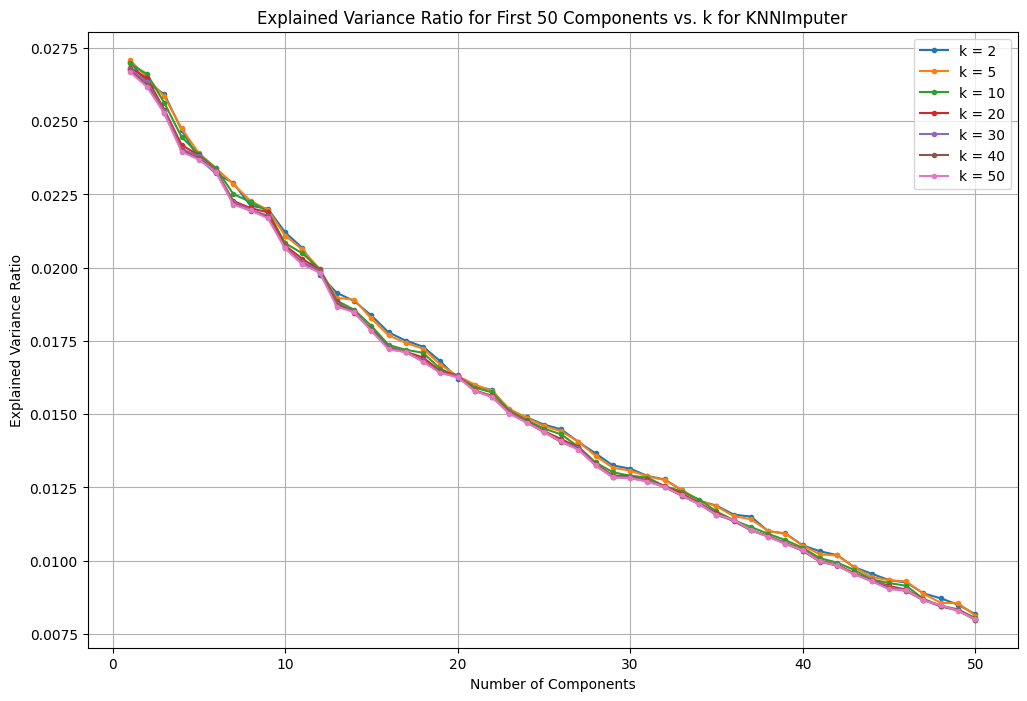

In [27]:
cumulative_explained_variances = []

console.print("Cumulative explained variance for different numbers of components:")

for i, ratios in enumerate(explained_variance_ratios):
    k = ks_to_evaluate[i]
    cumulative_variance = np.cumsum(ratios)
    cumulative_explained_variances.append(cumulative_variance)

    console.print(f"\nFor k = {k}:")
    components_to_print = [1, 2, 5, 10, 50, 100]
    for num_components in components_to_print:
        if num_components <= len(cumulative_variance):
            console.print(f"  {num_components} components: {cumulative_variance[num_components-1]:.4f}")
        else:
            console.print(f"  {num_components} components: More components than available ({len(cumulative_variance)})")

plt.figure(figsize=(12, 8))
for i, ratios in enumerate(explained_variance_ratios):
    k = ks_to_evaluate[i]
    plt.plot(range(1, min(len(ratios), 51)), ratios[:50], marker='.', linestyle='-', label=f'k = {k}')

plt.title('Explained Variance Ratio for First 50 Components vs. k for KNNImputer')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

### **K Value Conclusions**

- We selected K=5 because it offers good variation between components and computational performance should be better than with 10 or more.

In [28]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
df_genomics_strategy_2_gen_imputed = knn_imputer.fit_transform(df_genomics_strategy_2_gen_scaled)
df_genomics_strategy_2_gen_imputed = pd.DataFrame(df_genomics_strategy_2_gen_imputed, columns=df_genomics_strategy_2_gen_tumor.columns)

df_genomics_strategy_2_gen_imputed.head()

,Gen_1,Gen_2,Gen_3,Gen_4,Gen_5,Gen_6,Gen_7,Gen_8,Gen_9,Gen_10,...,Gen_191,Gen_192,Gen_193,Gen_194,Gen_195,Gen_196,Gen_197,Gen_198,Gen_199,Gen_200
0,-0.727413,-0.756005,2.254893,-0.655750,-0.353750,-0.466506,0.726340,-0.809657,0.535817,-1.128151,...,1.742862,0.229289,0.884072,-0.860073,-0.917548,-1.460334,0.863035,-0.927834,0.450997,0.032877
1,-0.760030,-0.871996,2.015588,-0.294318,-0.009579,-0.901550,1.149779,-0.873225,0.348984,-1.015232,...,1.821403,0.304578,1.034318,-0.947586,-0.635342,-1.286777,0.654153,-0.790664,0.871818,0.405295
2,-0.656728,-0.304901,1.934319,-0.611529,-0.258373,-0.683413,1.564876,-0.611402,0.337103,-0.656433,...,1.630548,0.333518,1.311116,-0.901591,-1.091367,-1.578386,0.781503,-0.351003,0.731165,0.324557
3,-0.516211,-0.494595,2.397833,-0.710852,-0.065132,-0.200601,1.374058,-0.929775,0.311715,-0.903779,...,1.789905,0.744637,1.077095,-0.900309,-0.773426,-1.724878,0.993773,-0.473361,0.830090,0.188776
4,-0.705495,-0.562078,2.009427,-0.703890,-0.457065,-0.325499,1.309897,-0.547384,0.362181,-0.652765,...,1.527506,0.264142,0.796272,-0.834141,-1.034932,-1.515849,1.095384,-0.705764,0.553730,0.255367


In [29]:
# There are NA fields
console.print(f"Are there NA fields? => {df_genomics_strategy_2_gen_imputed.isna().sum().any() > 0}")

Are there NA fields? => False

In [30]:
# Standard Scaler
scaler = StandardScaler()
df_genomics_strategy_2_gen_scaled = scaler.fit_transform(df_genomics_strategy_2_gen_imputed)

In [31]:
pca = PCA()
pca_data = pca.fit_transform(df_genomics_strategy_2_gen_scaled)

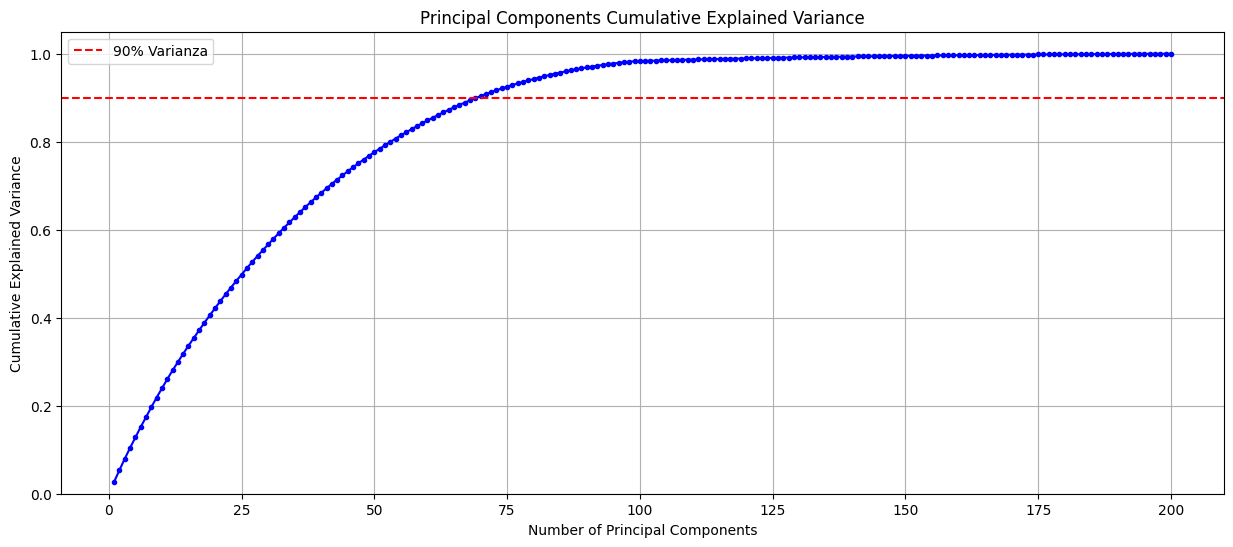

In [32]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(15, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='.', linestyle='-', color='blue')
plt.axhline(y=0.90, color='red', linestyle='--', label='90% Varianza')
plt.title("Principal Components Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.legend()
plt.ylim(0, 1.05)
plt.show()

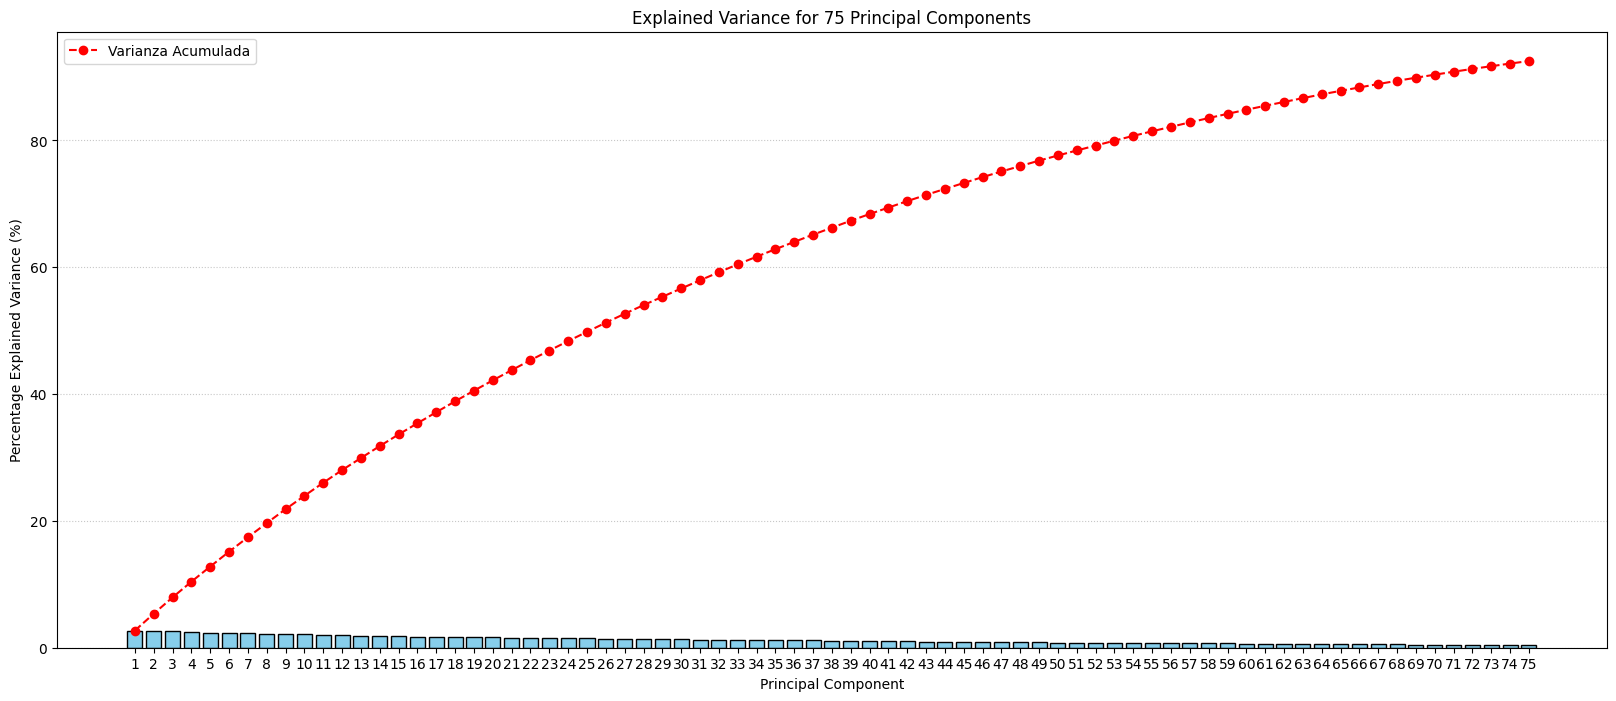

In [33]:
num_components_to_plot = 75
variances_to_plot = pca.explained_variance_ratio_[:num_components_to_plot] * 100

plt.figure(figsize=(20, 8))

plt.bar(range(1, num_components_to_plot + 1), variances_to_plot,
        color='skyblue', edgecolor='black')

plt.plot(range(1, num_components_to_plot + 1),
         cumulative_variance[:num_components_to_plot] * 100,
         marker='o',
         linestyle='--', color='red',
         label='Varianza Acumulada')

plt.title(f'Explained Variance for {num_components_to_plot} Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Percentage Explained Variance (%)')
plt.xticks(range(1, num_components_to_plot + 1))
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.legend()
plt.show()

In [34]:
loadings = pd.DataFrame(
    pca.components_.T[:, :2], # Tomamos solo los 2 primeros componentes
    columns=['PC1', 'PC2'],
    index=df_genomics_strategy_2_gen_tumor.columns
)
console.print("\nLoadings (contribución de cada gen) para PC1 y PC2:")
loadings

Loadings (contribución de cada gen) para PC1 y PC2:

,PC1,PC2
Gen_1,-0.076377,-0.022623
Gen_2,-0.019146,0.007267
Gen_3,-0.029315,-0.053853
Gen_4,-0.046054,-0.065958
Gen_5,0.048070,0.104244
...,...,...
Gen_196,0.007479,0.107267
Gen_197,-0.091619,0.082367
Gen_198,-0.027596,-0.004307
Gen_199,-0.061111,-0.032316


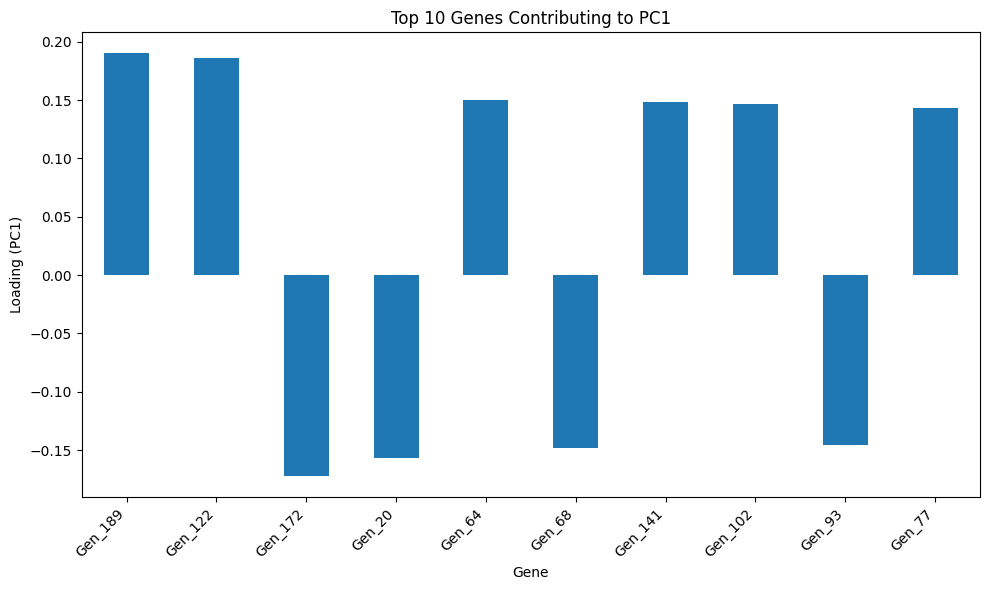

In [35]:
plt.figure(figsize=(10, 6))
loadings.reindex(loadings['PC1'].abs().sort_values(ascending=False).index).iloc[:10, 0].plot(kind='bar')
plt.title('Top 10 Genes Contributing to PC1')
plt.xlabel('Gene')
plt.ylabel('Loading (PC1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

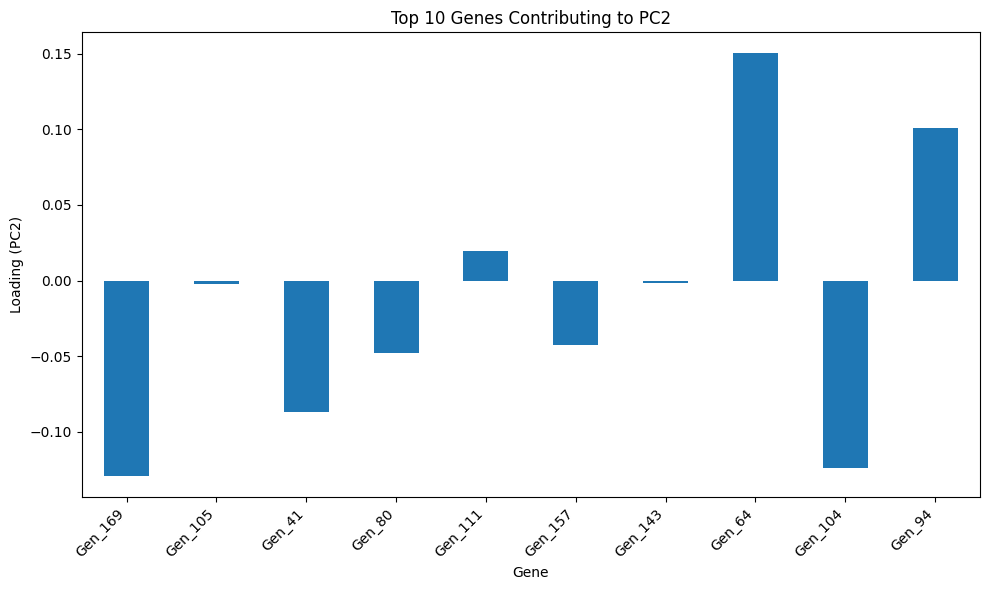

In [36]:
plt.figure(figsize=(10, 6))
loadings.reindex(loadings['PC2'].abs().sort_values(ascending=False).index).iloc[:10, 0].plot(kind='bar')
plt.title('Top 10 Genes Contributing to PC2')
plt.xlabel('Gene')
plt.ylabel('Loading (PC2)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

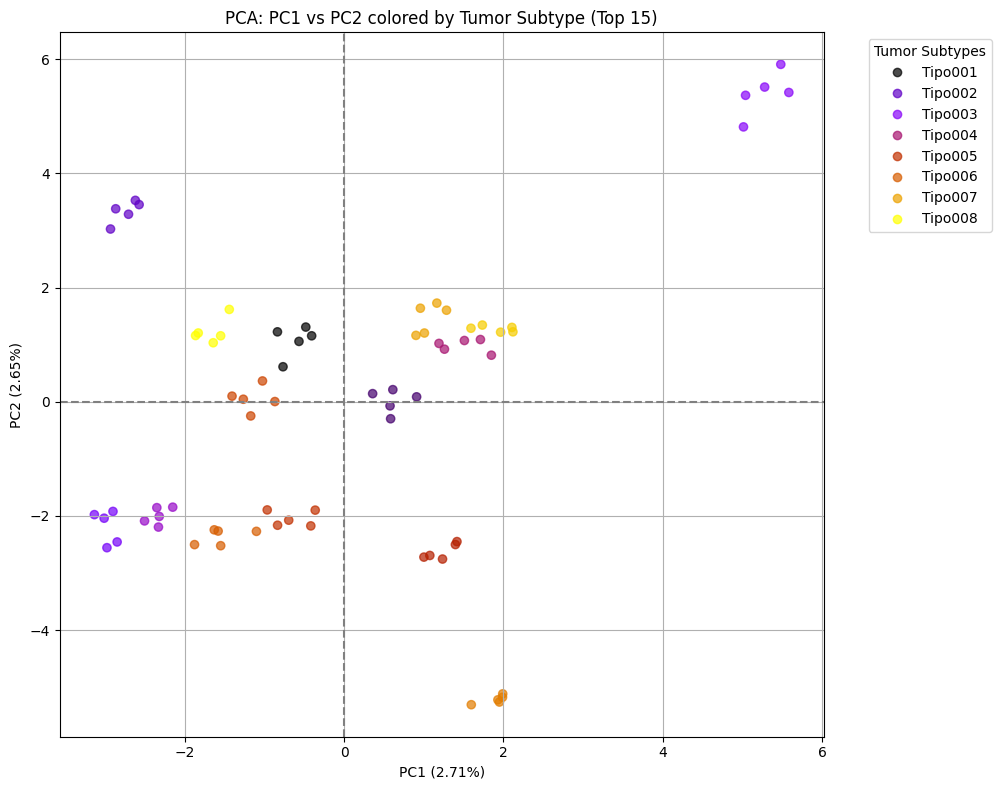

In [37]:
tumor_subtypes = df_genomics_copy['Muestra_ID'].apply(lambda x: x.split('_')[0])

scores = pca_data[:, :2]

# Get the top 15 most frequent tumor subtypes for better visualization
top_subtypes = tumor_subtypes.value_counts().nlargest(15).index.tolist()
filtered_indices = tumor_subtypes[tumor_subtypes.isin(top_subtypes)].index
scores_filtered = scores[filtered_indices]
tumor_subtypes_filtered = tumor_subtypes[filtered_indices]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(scores_filtered[:, 0], scores_filtered[:, 1], c=tumor_subtypes_filtered.astype('category').cat.codes, cmap='gnuplot', alpha=0.7)

plt.title('PCA: PC1 vs PC2 colored by Tumor Subtype (Top 15)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

legend_labels = top_subtypes
handles, _ = scatter.legend_elements()
legend = plt.legend(handles, legend_labels, title="Tumor Subtypes", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [38]:
import plotly.express as px

scores = pca_data[:, :3]

tumor_subtypes = df_genomics_copy["Muestra_ID"].apply(lambda x: x.split('_')[0])
top_subtypes = tumor_subtypes.value_counts().nlargest(15).index.tolist()
filtered_indices = tumor_subtypes[tumor_subtypes.isin(top_subtypes)].index
scores_filtered = scores[filtered_indices]
tumor_subtypes_filtered = tumor_subtypes[filtered_indices]

tumor_subtypes_filtered_str = tumor_subtypes_filtered.astype(str)

scores = pca_data[:, :3]

fig = px.scatter_3d(
    x=scores_filtered[:, 0],
    y=scores_filtered[:, 1],
    z=scores_filtered[:, 2],
    color=tumor_subtypes_filtered_str,
    title='PCA: PC1 vs PC2 vs PC3 colored by Tumor Subtype (Top 15) - Interactive Plotly',
    labels={'x': f'PC1 ({pca.explained_variance_ratio_[0]:.2%})', 'y': f'PC2 ({pca.explained_variance_ratio_[1]:.2%})', 'z': f'PC3 ({pca.explained_variance_ratio_[2]:.2%})'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

### **Conclusions K-NN**

-We can observe different clusters per tumor, meaning that there are genes that may differ between tumors, allowing them to be separated and identified.
- Some tumor clusters are divided into several parts but are separated from other tumors.
- PC1 represents 2.72% of the total variability.
- PC2 represents 2.65% of the total variability.
- PC3 represents 2.58% of the total variability.
- The explained variance is low in the first two components, but we can still observe clustering between tumor subtypes.
- The explained variance with two components is low, approximately 5.37%.
- Compared to the previous strategy, we can observe better clustering of all tumor subtypes.


## **Strategy 3: Integrated PCA (Advanced)**

- Use an alternative to the data-available principle (e.g., Bioconductor's pcaMethods) to run a PCA algorithm that natively handles missing values, such as Probabilistic PCA (PPCA) or NIPALS.
- Generate the PC1 vs. PC2 plot directly from the results of this method.
- **It's important to mention that the NIPAL and PPCA methods are neither native nor built into Python. The NIPAL methods had to be implemented from scratch using AI, and PPCA has a third-party library; however, it is not recognized nor part of a widely used library in the Python community.**

In [39]:
df_genomics_strategy_3_gen_tumor = df_genomics_copy.drop(columns=['Muestra_ID'])
df_genomics_strategy_3_gen_tumor

,Gen_1,Gen_2,Gen_3,Gen_4,Gen_5,Gen_6,Gen_7,Gen_8,Gen_9,Gen_10,...,Gen_191,Gen_192,Gen_193,Gen_194,Gen_195,Gen_196,Gen_197,Gen_198,Gen_199,Gen_200
0,-0.926129,-1.299938,3.486351,-1.102222,-0.428913,-0.747000,NaN,-1.086151,0.995133,-1.753780,...,3.144455,NaN,1.096837,-1.244325,-1.443022,-2.381379,1.048995,-1.383841,0.621816,-0.248506
1,-0.972536,-1.477558,3.135393,-0.524263,0.094519,-1.368749,1.573978,-1.184006,0.696335,-1.582650,...,3.279682,0.449016,1.318615,-1.378695,-1.000856,-2.110287,0.763144,-1.179839,1.232153,0.344501
2,-0.825555,-0.609148,3.016207,-1.031508,-0.283858,-1.056996,2.222693,-0.780960,0.677335,-1.038886,...,2.951083,0.494515,1.727196,-1.308072,-1.715366,-2.565775,0.937421,-0.525962,1.028157,0.215942
3,-0.625623,-0.899633,3.695983,-1.190333,0.010032,-0.366977,1.924482,-1.271057,0.636734,-1.413743,...,3.225449,1.140868,1.381758,-1.306104,-1.217209,-2.794594,1.227908,-0.707937,1.171632,-0.000266
4,-0.894942,-1.002972,3.126358,-1.179200,-0.586038,-0.545477,1.824211,-0.682414,0.717442,-1.033328,...,2.773673,0.385443,0.967235,-1.204508,-1.626941,NaN,1.366961,-1.053573,0.770814,0.105769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-2.044458,-1.947307,2.222913,-0.426984,0.696481,2.287694,-2.338079,1.255258,0.653233,-0.404246,...,2.065160,0.894647,1.696406,3.536897,-0.387330,NaN,0.782691,2.019641,1.700189,1.098131
496,-1.672726,-2.088202,2.081054,-0.885337,0.947018,2.818235,-2.480211,1.662084,0.791437,-0.366129,...,2.131005,0.948183,1.781659,3.319376,-0.545112,0.107048,1.199760,1.942950,1.963081,1.214833
497,-1.405426,-2.098299,1.336024,-0.757675,NaN,2.390432,-2.371081,0.370994,0.199872,0.392915,...,2.099843,0.757213,1.562661,3.457007,NaN,-0.367767,1.368549,1.595460,1.775678,1.130765
498,-1.075570,-1.477698,1.651338,-0.608227,0.143973,2.948940,-2.656643,0.551182,0.034984,-0.207469,...,2.388978,0.366727,1.037903,3.381696,-1.114617,-0.281881,0.763747,1.936234,1.785732,1.600857


In [40]:
# There are NA fields
console.print(f"Are there NA fields? => {df_genomics_strategy_3_gen_tumor.isna().sum().any() > 0}")

Are there NA fields? => True

In [41]:
# Standard Scaler
scaler = StandardScaler()
df_genomics_strategy_3_gen_scaled = scaler.fit_transform(df_genomics_strategy_3_gen_tumor)

### **NIPALS (Nonlinear Iterative Partial Least Squares)**

Don't pad NaNs directly: just skip or partially adjust them at each step



In [42]:
#Create with GPT because there is no library for NIPAL with Python
import numpy as np

class PCA_NIPALS:
    def __init__(self, n_components=2, tol=1e-6, max_iter=500, center=True, scale=False):
        """
        Implementación de PCA mediante el algoritmo NIPALS.
        Similar a pcaMethods(method="nipals") en Bioconductor.
        """
        self.n_components = n_components
        self.tol = tol
        self.max_iter = max_iter
        self.center = center
        self.scale = scale

    def fit(self, X):
        X = np.array(X, dtype=float)
        self.n, self.p = X.shape

        self.mean_ = np.nanmean(X, axis=0)
        self.std_ = np.nanstd(X, axis=0, ddof=1)
        Xh = X.copy()

        if self.center:
            Xh -= self.mean_
        if self.scale:
            Xh /= self.std_

        T = np.zeros((self.n, self.n_components))
        P = np.zeros((self.p, self.n_components))
        explained_variance = np.zeros(self.n_components)

        for i in range(self.n_components):
            col_var = np.nanvar(Xh, axis=0)
            t = Xh[:, np.nanargmax(col_var)].copy().reshape(-1, 1)

            for iteration in range(self.max_iter):
                # p = X' * t / (t' * t)
                p_num = np.nansum(Xh * t, axis=0)
                p_den = np.nansum(t ** 2)
                p = p_num / p_den
                p = p / np.sqrt(np.nansum(p ** 2))
                p = p.reshape(-1, 1)

                # t_new = X * p / (p' * p)
                t_new_num = np.nansum(Xh * p.T, axis=1)
                t_new_den = np.nansum(p ** 2)
                t_new = (t_new_num / t_new_den).reshape(-1, 1)

                if np.linalg.norm(t_new - t) < self.tol:
                    break
                t = t_new

            T[:, i] = t.ravel()
            P[:, i] = p.ravel()
            explained_variance[i] = np.nanvar(t)

            Xh = Xh - t @ p.T

        total_var = np.nansum(np.nanvar(X - (self.mean_ if self.center else 0), axis=0))
        self.explained_variance_ratio_ = explained_variance / total_var

        self.T_ = T
        self.P_ = P
        self.X_reconstructed_ = self.inverse_transform()

        return self

    def transform(self, X):
        X = np.array(X, dtype=float)
        if self.center:
            X -= self.mean_
        if self.scale:
            X /= self.std_
        return np.dot(X, self.P_)

    def inverse_transform(self, T=None):
        if T is None:
            T = self.T_
        X_rec = np.dot(T, self.P_.T)
        if self.center:
            X_rec += self.mean_
        if self.scale:
            X_rec *= self.std_
        return X_rec


In [43]:
pca = PCA_NIPALS(n_components=200)
pca.fit(df_genomics_strategy_3_gen_scaled)
pca_data = pca.T_

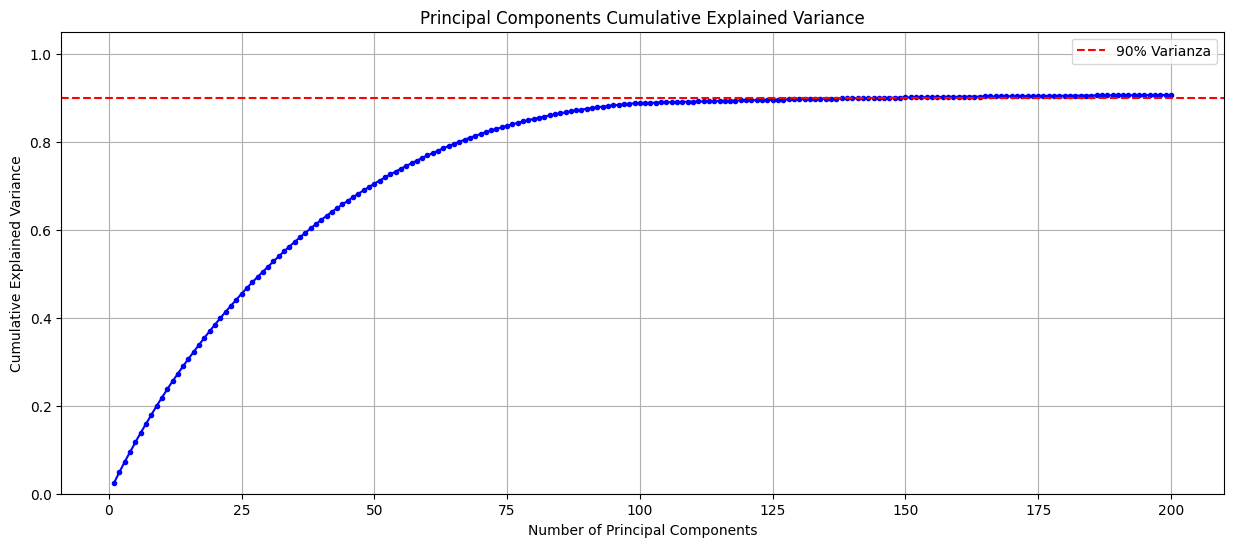

In [44]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(15, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='.', linestyle='-', color='blue')
plt.axhline(y=0.90, color='red', linestyle='--', label='90% Varianza')
plt.title("Principal Components Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.legend()
plt.ylim(0, 1.05)
plt.show()

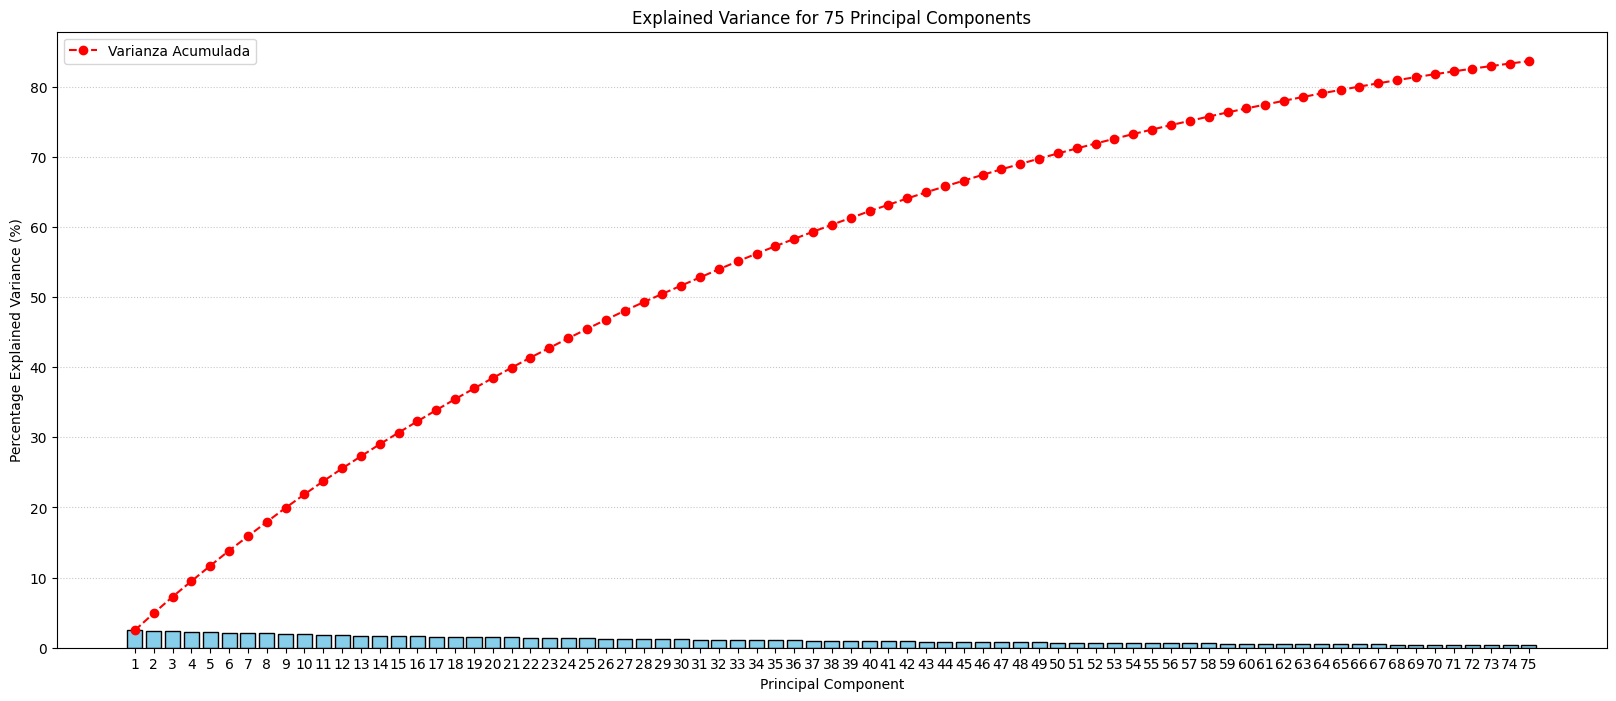

In [45]:
num_components_to_plot = 75
variances_to_plot = pca.explained_variance_ratio_[:num_components_to_plot] * 100

plt.figure(figsize=(20, 8))

plt.bar(range(1, num_components_to_plot + 1), variances_to_plot,
        color='skyblue', edgecolor='black')

plt.plot(range(1, num_components_to_plot + 1),
         cumulative_variance[:num_components_to_plot] * 100,
         marker='o',
         linestyle='--', color='red',
         label='Varianza Acumulada')

plt.title(f'Explained Variance for {num_components_to_plot} Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Percentage Explained Variance (%)')
plt.xticks(range(1, num_components_to_plot + 1))
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.legend()
plt.show()

In [46]:
loadings = pd.DataFrame(
    pca.P_[:, :2], # Tomamos solo los 2 primeros componentes
    columns=['PC1', 'PC2'],
    index=df_genomics_strategy_2_gen_tumor.columns
)
console.print("\nLoadings (contribución de cada gen) para PC1 y PC2:")
loadings

Loadings (contribución de cada gen) para PC1 y PC2:

,PC1,PC2
Gen_1,0.051515,0.004309
Gen_2,0.015527,-0.015194
Gen_3,0.038557,0.052681
Gen_4,0.043215,0.034634
Gen_5,-0.049592,-0.106241
...,...,...
Gen_196,-0.017088,-0.087825
Gen_197,0.082664,-0.083880
Gen_198,0.037858,0.001585
Gen_199,0.074077,0.012394


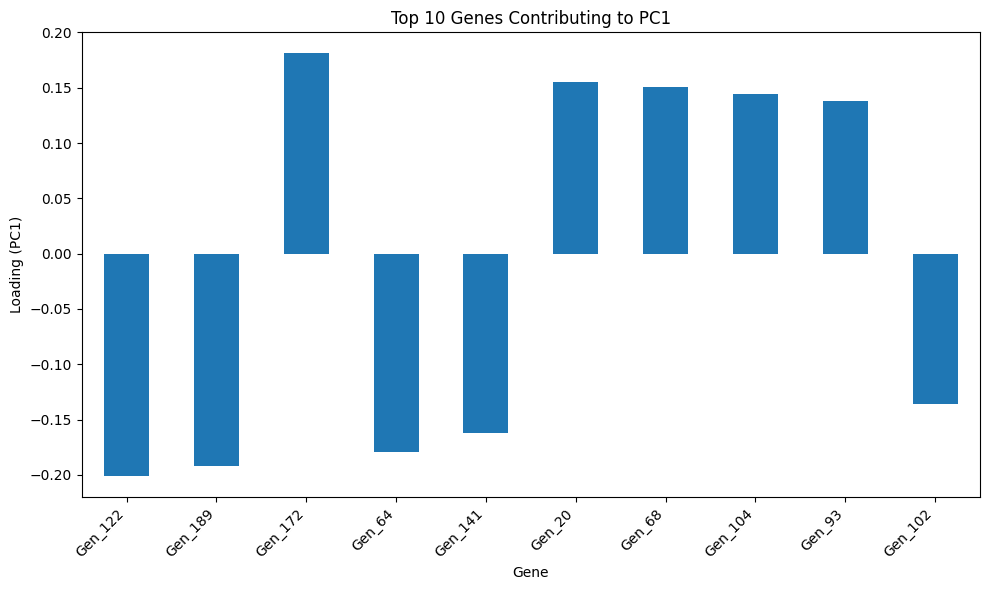

In [47]:
plt.figure(figsize=(10, 6))
loadings.reindex(loadings['PC1'].abs().sort_values(ascending=False).index).iloc[:10, 0].plot(kind='bar')
plt.title('Top 10 Genes Contributing to PC1')
plt.xlabel('Gene')
plt.ylabel('Loading (PC1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

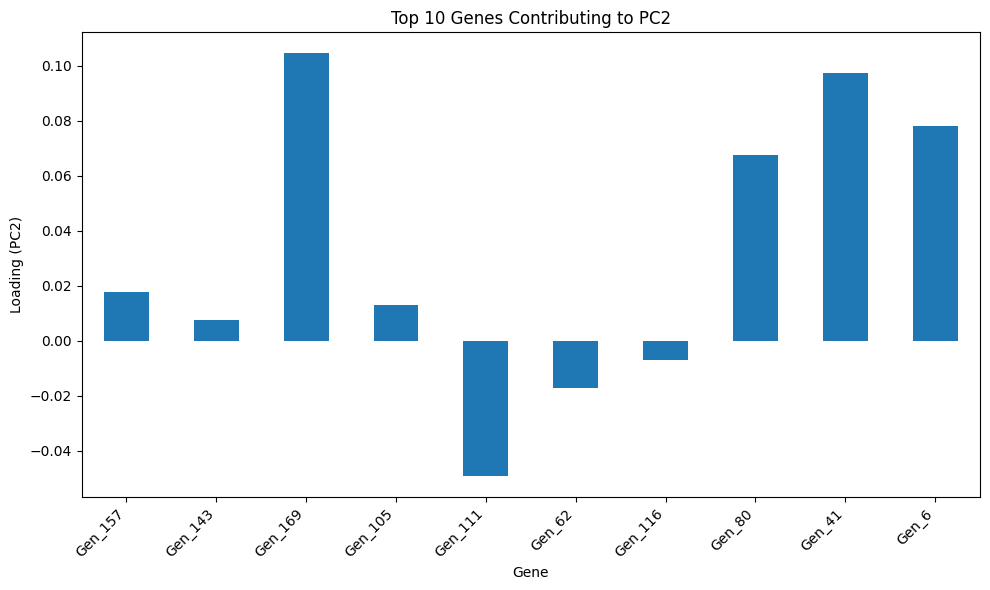

In [48]:
plt.figure(figsize=(10, 6))
loadings.reindex(loadings['PC2'].abs().sort_values(ascending=False).index).iloc[:10, 0].plot(kind='bar')
plt.title('Top 10 Genes Contributing to PC2')
plt.xlabel('Gene')
plt.ylabel('Loading (PC2)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

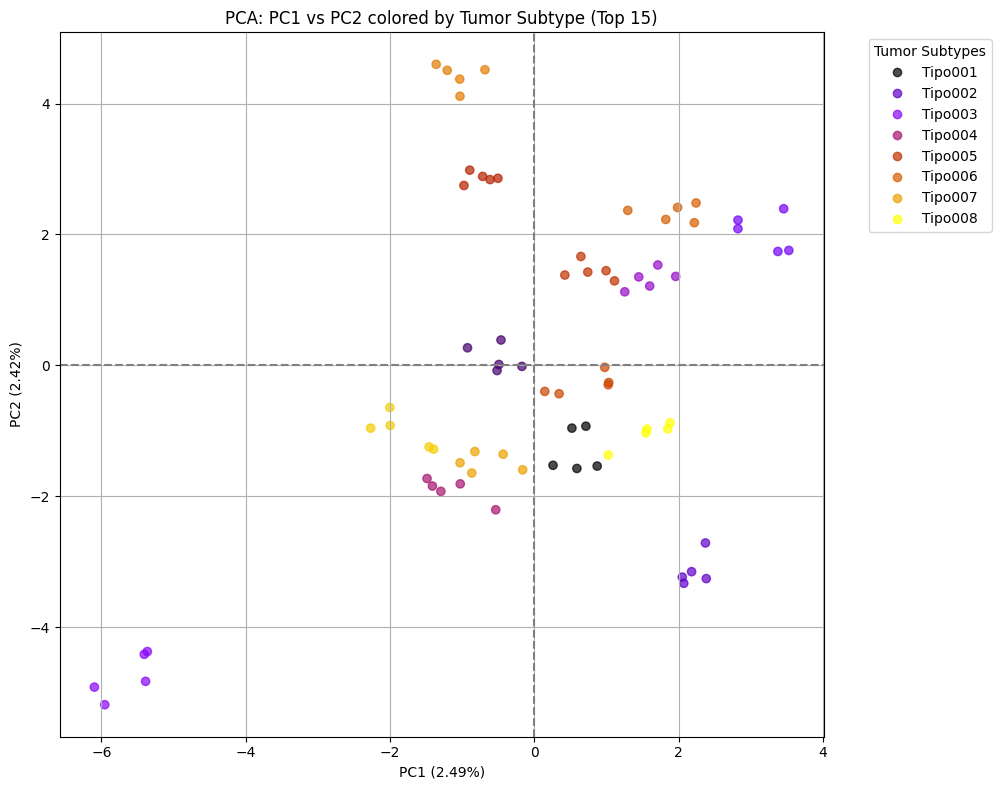

In [49]:
tumor_subtypes = df_genomics_copy["Muestra_ID"].apply(lambda x: x.split('_')[0])

scores = pca_data[:, :2]

top_subtypes = tumor_subtypes.value_counts().nlargest(15).index.tolist()
filtered_indices = tumor_subtypes[tumor_subtypes.isin(top_subtypes)].index
scores_filtered = scores[filtered_indices]
tumor_subtypes_filtered = tumor_subtypes[filtered_indices]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(scores_filtered[:, 0], scores_filtered[:, 1], c=tumor_subtypes_filtered.astype('category').cat.codes, cmap='gnuplot', alpha=0.7)

plt.title('PCA: PC1 vs PC2 colored by Tumor Subtype (Top 15)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

legend_labels = top_subtypes
handles, _ = scatter.legend_elements()
legend = plt.legend(handles, legend_labels, title="Tumor Subtypes", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [50]:
import plotly.express as px

scores = pca_data[:, :3]

tumor_subtypes = df_genomics_copy["Muestra_ID"].apply(lambda x: x.split('_')[0])
top_subtypes = tumor_subtypes.value_counts().nlargest(15).index.tolist()
filtered_indices = tumor_subtypes[tumor_subtypes.isin(top_subtypes)].index
scores_filtered = scores[filtered_indices]
tumor_subtypes_filtered = tumor_subtypes[filtered_indices]

tumor_subtypes_filtered_str = tumor_subtypes_filtered.astype(str)

scores = pca_data[:, :3]

fig = px.scatter_3d(
    x=scores_filtered[:, 0],
    y=scores_filtered[:, 1],
    z=scores_filtered[:, 2],
    color=tumor_subtypes_filtered_str,
    title='PCA: PC1 vs PC2 vs PC3 colored by Tumor Subtype (Top 15) - Interactive Plotly',
    labels={'x': f'PC1 ({pca.explained_variance_ratio_[0]:.2%})', 'y': f'PC2 ({pca.explained_variance_ratio_[1]:.2%})', 'z': f'PC3 ({pca.explained_variance_ratio_[2]:.2%})'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

### **Conclusions NIPALs**

- We can observe different clusters by tumor subtype, meaning that there are genes that may differ between tumors, allowing them to be separated and identified.
- Some clusters by tumor subtype are divided into several parts of the plane, but are separated from other tumors.
- PC1 represents 2.49% of the total variability.
- PC2 represents 2.42% of the total variability.
- PC3 represents 2.35% of the total variability.
- The explained variance is low in the first two components, but we can still observe clusters between tumor subtypes.
- The explained variance with two components is low, approximately 4.91%.
- Components PC1 and PC2 present less variance than the previous strategies.
- Compared to the previous strategy, the clustering is good, but not better.
- There is no a official library for NIPALs with Python

### **PPCA**

- Handles missing values ​​naturally.

- Allows for probabilistically inferring principal components and reconstructing data.

In [51]:
!pip install ppca

In [52]:
from ppca import PPCA

ppca = PPCA()
ppca.fit(data=df_genomics_strategy_3_gen_scaled)
ppca_data = ppca.transform()

/usr/local/lib/python3.12/dist-packages/ppca/_ppca.py:82: RuntimeWarning:

divide by zero encountered in log



In [53]:
explained_values_ppca = ppca.eig_vals / np.sum(ppca.eig_vals)

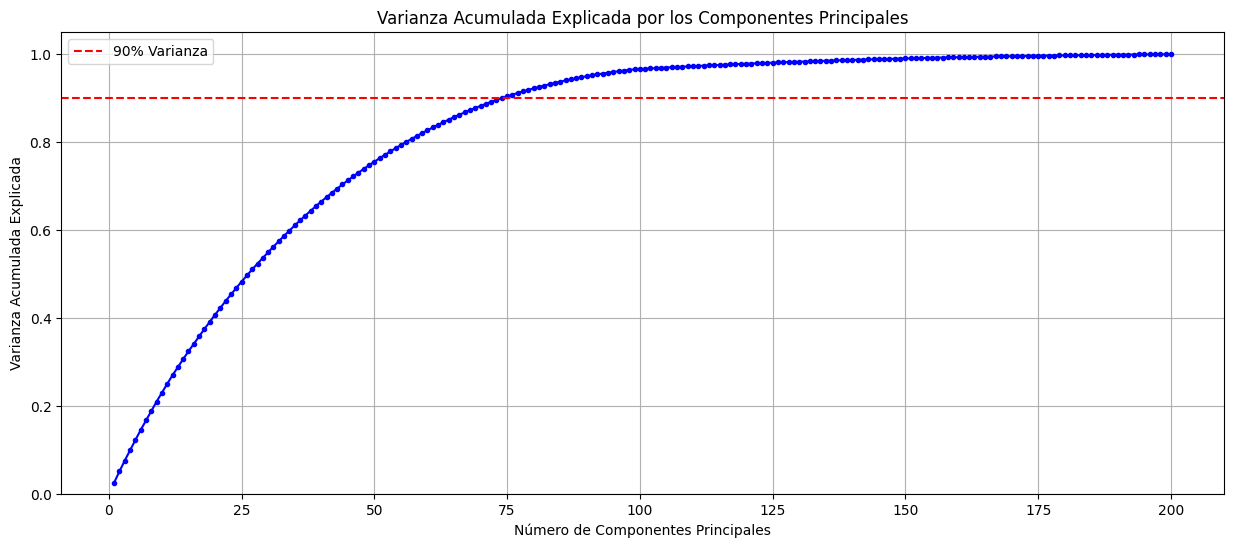

In [54]:
cumulative_variance = np.cumsum(explained_values_ppca)

plt.figure(figsize=(15, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='.', linestyle='-', color='blue')
plt.axhline(y=0.90, color='red', linestyle='--', label='90% Varianza')
plt.title("Varianza Acumulada Explicada por los Componentes Principales")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Acumulada Explicada")
plt.grid(True)
plt.legend()
plt.ylim(0, 1.05)
plt.show()

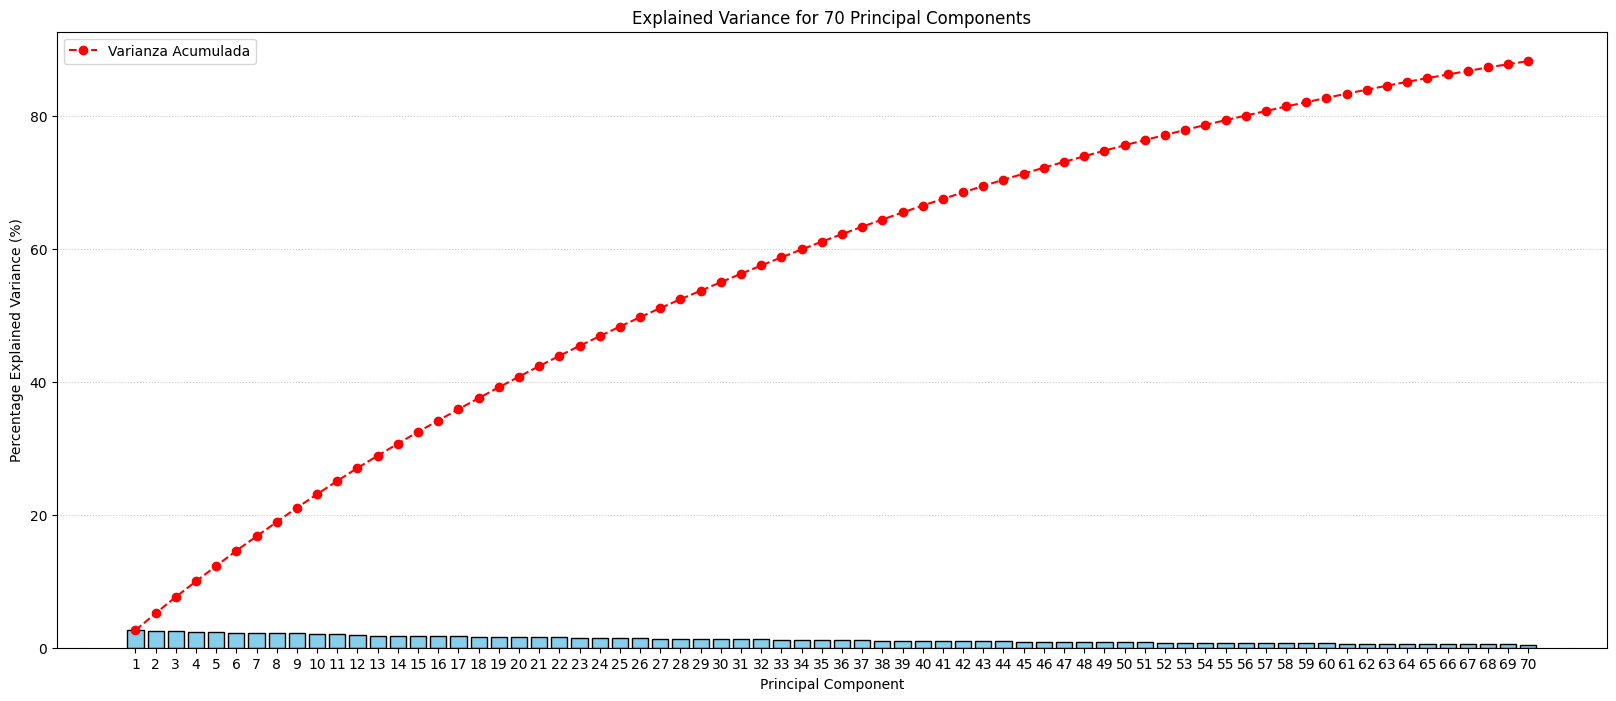

In [55]:
num_components_to_plot = 70
variances_to_plot = explained_values_ppca[:num_components_to_plot] * 100

plt.figure(figsize=(20, 8))

plt.bar(range(1, num_components_to_plot + 1), variances_to_plot,
        color='skyblue', edgecolor='black')

plt.plot(range(1, num_components_to_plot + 1),
         cumulative_variance[:num_components_to_plot] * 100,
         marker='o',
         linestyle='--', color='red',
         label='Varianza Acumulada')

plt.title(f'Explained Variance for {num_components_to_plot} Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Percentage Explained Variance (%)')
plt.xticks(range(1, num_components_to_plot + 1))
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.legend()
plt.show()

In [56]:
loadings = pd.DataFrame(
    ppca.C[:, :2], # Tomamos solo los 2 primeros componentes
    columns=['PC1', 'PC2'],
    index=df_genomics_strategy_2_gen_tumor.columns
)
console.print("\nLoadings (contribución de cada gen) para PC1 y PC2:")
loadings

Loadings (contribución de cada gen) para PC1 y PC2:

,PC1,PC2
Gen_1,0.051516,-0.002614
Gen_2,0.015527,0.011643
Gen_3,0.038557,-0.053367
Gen_4,0.043215,-0.032850
Gen_5,-0.049593,0.104634
...,...,...
Gen_196,-0.017088,0.086408
Gen_197,0.082664,0.084397
Gen_198,0.037857,-0.002217
Gen_199,0.074077,-0.009477


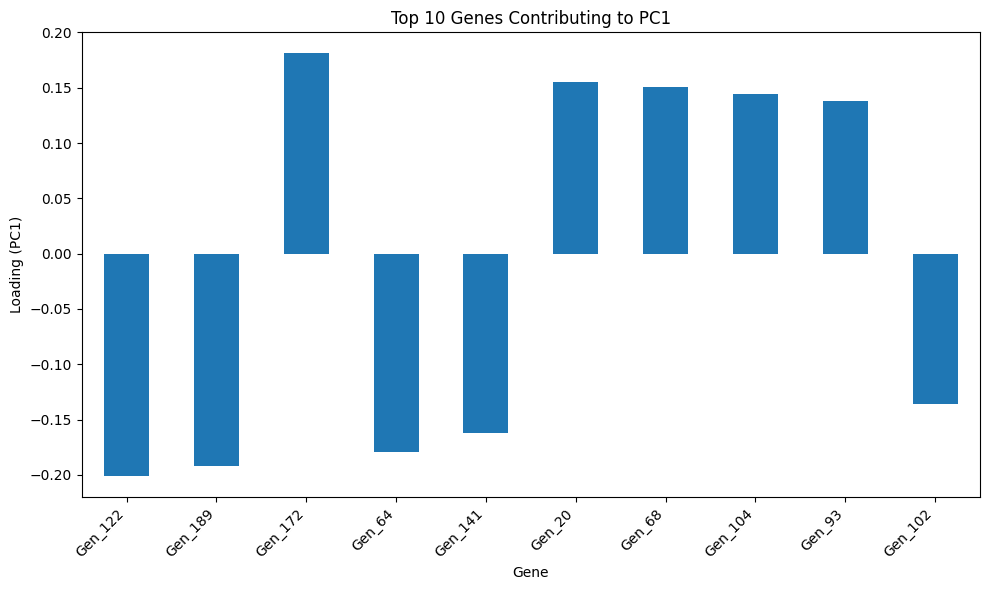

In [57]:
plt.figure(figsize=(10, 6))
loadings.reindex(loadings['PC1'].abs().sort_values(ascending=False).index).iloc[:10, 0].plot(kind='bar')
plt.title('Top 10 Genes Contributing to PC1')
plt.xlabel('Gene')
plt.ylabel('Loading (PC1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

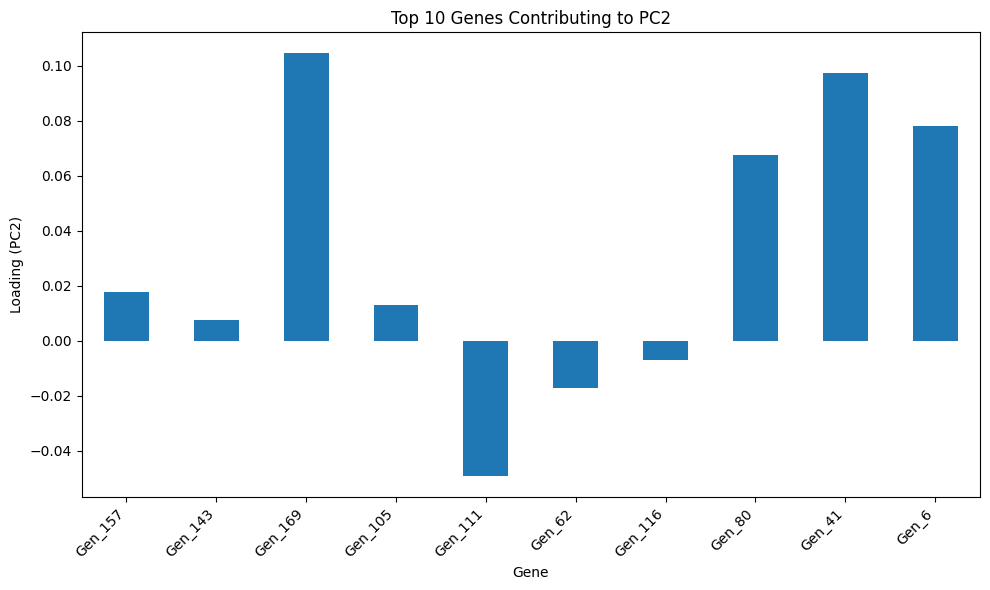

In [58]:
plt.figure(figsize=(10, 6))
loadings.reindex(loadings['PC2'].abs().sort_values(ascending=False).index).iloc[:10, 0].plot(kind='bar')
plt.title('Top 10 Genes Contributing to PC2')
plt.xlabel('Gene')
plt.ylabel('Loading (PC2)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

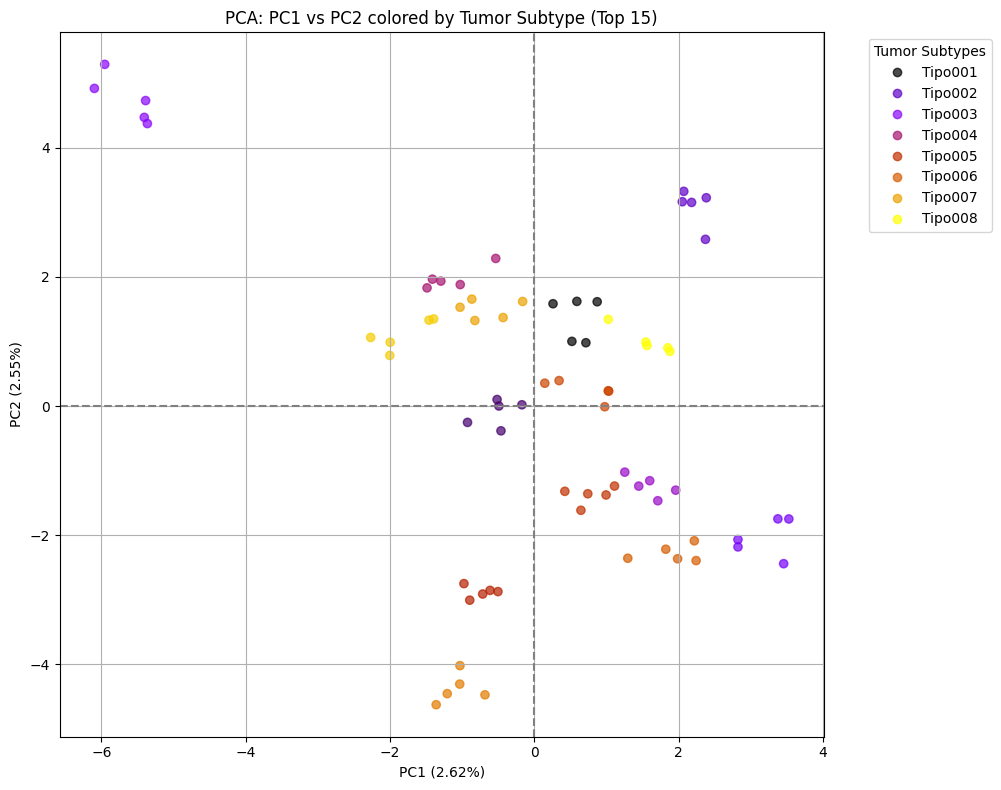

In [59]:
tumor_subtypes = df_genomics_copy["Muestra_ID"].apply(lambda x: x.split('_')[0])

scores = ppca_data[:, :2]

# Get the top 15 most frequent tumor subtypes for better visualization
top_subtypes = tumor_subtypes.value_counts().nlargest(15).index.tolist()
filtered_indices = tumor_subtypes[tumor_subtypes.isin(top_subtypes)].index
scores_filtered = scores[filtered_indices]
tumor_subtypes_filtered = tumor_subtypes[filtered_indices]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(scores_filtered[:, 0], scores_filtered[:, 1], c=tumor_subtypes_filtered.astype('category').cat.codes, cmap='gnuplot', alpha=0.7)

plt.title('PCA: PC1 vs PC2 colored by Tumor Subtype (Top 15)')
plt.xlabel(f'PC1 ({explained_values_ppca[0]:.2%})')
plt.ylabel(f'PC2 ({explained_values_ppca[1]:.2%})')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

legend_labels = top_subtypes
handles, _ = scatter.legend_elements()
legend = plt.legend(handles, legend_labels, title="Tumor Subtypes", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [60]:
import plotly.express as px

scores = ppca_data[:, :3]

tumor_subtypes = df_genomics_copy["Muestra_ID"].apply(lambda x: x.split('_')[0])
top_subtypes = tumor_subtypes.value_counts().nlargest(15).index.tolist()
filtered_indices = tumor_subtypes[tumor_subtypes.isin(top_subtypes)].index
scores_filtered = scores[filtered_indices]
tumor_subtypes_filtered = tumor_subtypes[filtered_indices]

tumor_subtypes_filtered_str = tumor_subtypes_filtered.astype(str)

fig = px.scatter_3d(
    x=scores_filtered[:, 0],
    y=scores_filtered[:, 1],
    z=scores_filtered[:, 2],
    color=tumor_subtypes_filtered_str,
    title='PCA: PC1 vs PC2 vs PC3 colored by Tumor Subtype (Top 15) - Interactive Plotly',
    labels={'x': f'PC1 ({explained_values_ppca[0]:.2%})', 'y': f'PC2 ({explained_values_ppca[1]:.2%})', 'z': f'PC3 ({explained_values_ppca[2]:.2%})'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

### **Conclusions PPCA**

- We can observe different clusters by tumor subtype, meaning that there are genes that may differ between tumors, allowing them to be separated and identified.
- Some clusters by tumor subtype are divided into several parts of the plane, but are separated from other tumors.
- PC1 has 2.77% of the total variability
- PC2 has 2.70% of the total variability
- PC3 has 2.65% of the total variability
- There is a low explained variance but we can observe grouping between tumors
- There is a low explained variance with two components, **approximately 5.47%**
- Componentes PC1 and PC2 have higher variance than previous strategies
- Regarding the previous strategies wae can observe same clusters

